### reads with neural network prediction

In [54]:
import sys
import importlib
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12

In [1]:
sigalign = '../data/240115_chrom_pass.sorted_all_sig.tsv'
chrom_totalreads = {}
with open(sigalign, 'r') as infile:
    for line in infile:
        chrom = line.strip().split('\t', 3)[1]
        if chrom not in chrom_totalreads:
            chrom_totalreads[chrom] = 1
        else:
            chrom_totalreads[chrom]+=1

In [2]:
pred = '../data/resnetv1_all_prediction.tsv'
chrom_predreads = {}
with open(pred, 'r') as infile:
    for line in infile:
        chrom = line.strip().split('\t')[-1]
        if chrom not in chrom_predreads:
            chrom_predreads[chrom] = 1
        else:
            chrom_predreads[chrom]+=1

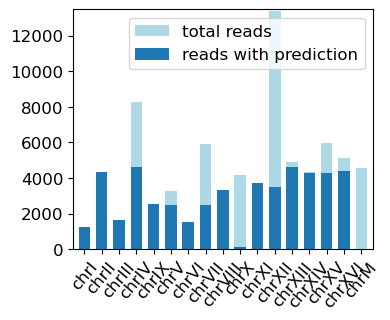

In [75]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
left = 1
dist = 3
xaxis_ticks = []
xaxis_ticks_labels = []
for chrom, reads in chrom_totalreads.items():
    xaxis_ticks.append(left+1)
    xaxis_ticks_labels.append(chrom)
    rct = mplpatches.Rectangle([left, 0], 2, reads,
                                facecolor = 'lightblue',
                                edgecolor = 'black',
                                linewidth = 0, label='total reads' if left==1 else "")
    ax.add_patch(rct)
    if chrom in chrom_predreads:
        rct = mplpatches.Rectangle([left, 0], 2, chrom_predreads[chrom],
                                    facecolor = 'tab:blue',
                                    edgecolor = 'black',
                                    linewidth = 0, label='reads with prediction' if left==1 else "")
        ax.add_patch(rct)
    left += dist

ax.set_xticks(xaxis_ticks, xaxis_ticks_labels)
ax.set_xticklabels(xaxis_ticks_labels, rotation = 50)
ax.set_xlim(0, left)
ax.set_ylim(0, np.max(list(chrom_totalreads.values()))+100)
ax.legend(numpoints=1)
plt.subplots_adjust(bottom=0.2, left = 0.2, right=0.8, top=0.8)
plt.savefig('../figures/Supp_reads_with_prediction.pdf')

### Why pick 400 singal length

In [53]:
from scipy import stats as st

posfile = '/gicephfs/brookslab/bsaintjo/220516_ang_conc_unique/unique.500.eventalign.tsv'

### signal seq length per hexamer

In [55]:
kmer = ''
read = ''
count = 0
scoreLens = []
with open(posfile, 'r') as infile:
    header = infile.readlines(1)
    for line in infile:
        line = line.strip().split('\t')
        chrom = line[0]
        pos = line[1]
        thiskmer = line[2]
        thisread = line[3]
        if thisread != read:
            count +=1
            read = thisread
        if count > 200:
            break
        score = line[-1].split(',')
        if thiskmer != kmer:
            if kmer:
                scoreLens.append(scoreLen)
            kmer = thiskmer
            scoreLen = len(score)
        else:
            scoreLen += len(score)

In [56]:
np.min(scoreLens), np.max(scoreLens), np.mean(scoreLens), np.median(scoreLens), st.mode(scoreLens)

(3, 4112, 12.030901342356866, 8.0, ModeResult(mode=5, count=51565))

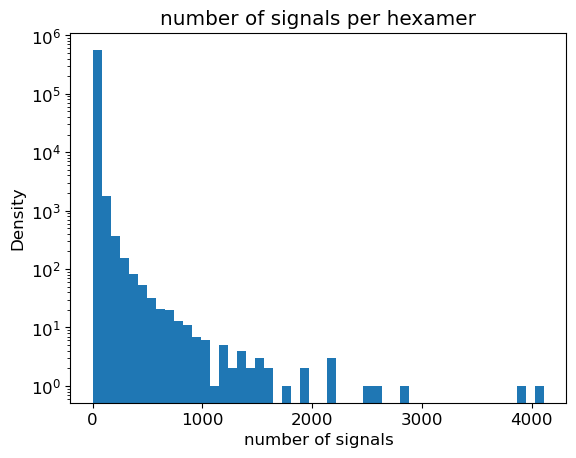

In [57]:
plt.hist(scoreLens, bins=50)
plt.yscale('log')
plt.xlabel('number of signals')
plt.ylabel('Density')
plt.title('number of signals per hexamer')
plt.savefig('../figures/Supp_number_of_signals_per_hexamer.pdf')

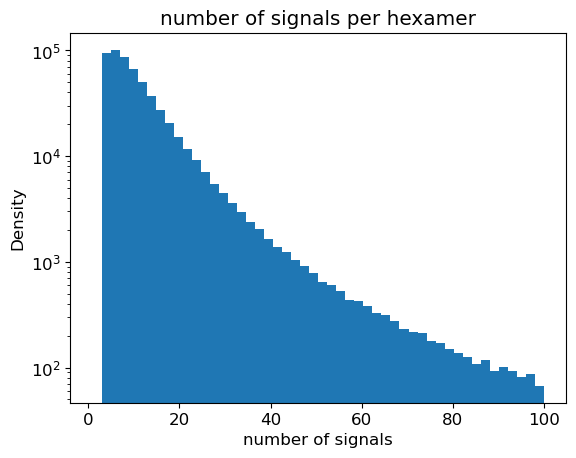

In [58]:
plt.hist(scoreLens, bins=50, range = (1,100))
plt.yscale('log')
plt.xlabel('number of signals')
plt.ylabel('Density')
plt.title('number of signals per hexamer')
plt.savefig('../figures/Supp_number_of_signals_per_hexamer_1_100.pdf')

### number of signals per 75bp window

In [59]:
kmer = ''
read = ''
count = 0
scoreLens = []
pos = 0
window_scoreLens = []
with open(posfile, 'r') as infile:
    header = infile.readlines(1)
    for line in infile:
        line = line.strip().split('\t')
        chrom = line[0]
        thispos = int(line[1])
        if thispos - pos + 6 == 75:
            window_scoreLens.append(scoreLen)
            scoreLen = 0
            pos = thispos
        thiskmer = line[2]
        thisread = line[3]
        if thisread != read:
            if read:
                count +=1
                scoreLen = 0
            read = thisread
            pos = thispos
        if count > 200:
            break
        score = line[-1].split(',')
        scoreLen += len(score)

In [60]:
np.min(window_scoreLens), np.max(window_scoreLens), np.mean(window_scoreLens), np.median(window_scoreLens)

(437, 2708, 765.7675239536056, 722.0)

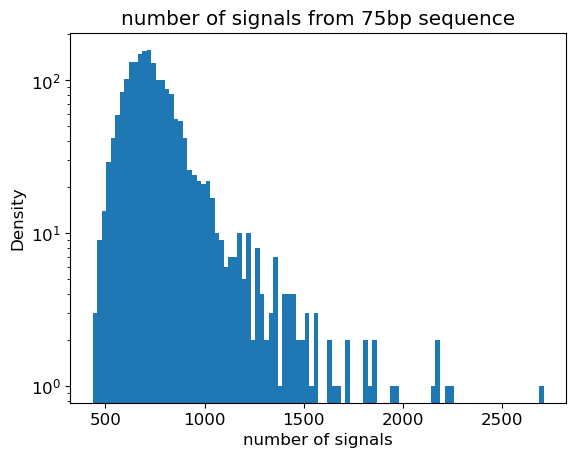

In [61]:
plt.hist(window_scoreLens, bins=100)
plt.yscale('log')
plt.xlabel('number of signals')
plt.ylabel('Density')
plt.title('number of signals from 75bp sequence')
plt.savefig('../figures/Supp_number_of_signals_per_window_before_filter_signal_length_per_hexamer.pdf')

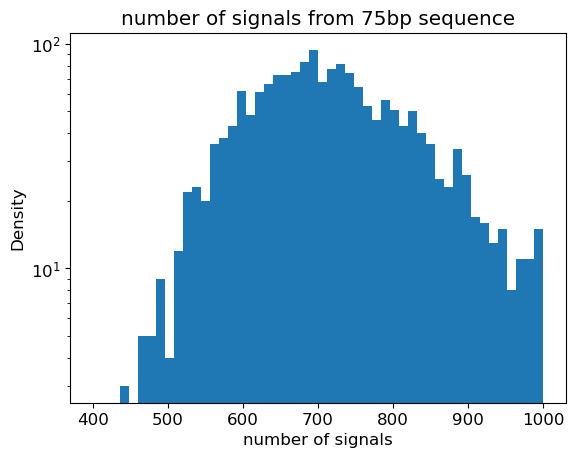

In [63]:
plt.hist(window_scoreLens, bins=50, range = (400, 1000))
plt.yscale('log')
plt.xlabel('number of signals')
plt.ylabel('Density')
plt.title('number of signals from 75bp sequence')
plt.savefig('../figures/Supp_number_of_signals_per_window_before_filter_signal_length_per_hexamer_400_1000.pdf')

In [64]:
kmer = ''
read = ''
count = 0
kmer_scoreLens = 0
scoreLens = []
kmerpos = 0
pos = 0
window_scoreLens = []
with open(posfile, 'r') as infile:
    header = infile.readlines(1)
    for line in infile:
        line = line.strip().split('\t')
        chrom = line[0]
        thispos = int(line[1])
        if thispos - pos + 6 == 75:
            window_scoreLens.append(scoreLen)
            scoreLen = 0
            kmer_scoreLens = 0
            pos = thispos
        thiskmer = line[2]
        thisread = line[3]
        if thisread != read:
            if read:
                count +=1
                scoreLen = 0
            read = thisread
            pos = thispos
        if count > 200:
            break
        score = line[-1].split(',')
        adds = len(score)
        if (thispos, thiskmer) == (kmerpos, kmer):
            kmer_scoreLens += len(score)
            if kmer_scoreLens > 10:
                adds = 0
        else:
            kmer_scoreLens = 0
        kmerpos = thispos
        kmer = thiskmer
        scoreLen += adds

In [65]:
np.min(window_scoreLens), np.max(window_scoreLens), np.mean(window_scoreLens), np.median(window_scoreLens)

(343, 790, 560.6696923852749, 559.0)

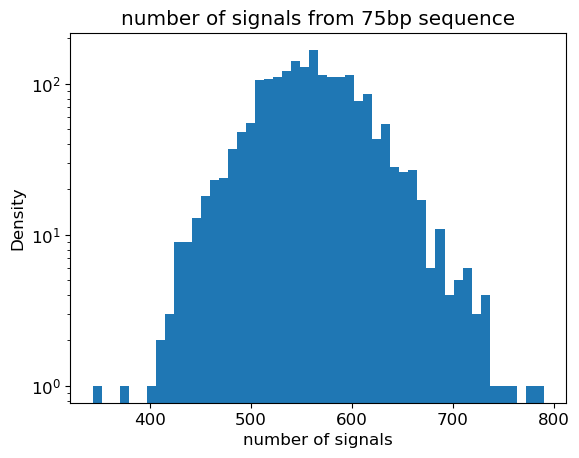

In [66]:
plt.hist(window_scoreLens, bins=50)
plt.yscale('log')
plt.xlabel('number of signals')
plt.ylabel('Density')
plt.title('number of signals from 75bp sequence')
plt.savefig('../figures/Supp_number_of_signals_per_hexamer_after_filter_less_than_10_signals_per_hexamer.pdf')